In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
import tensorflow as tf
from sklearn import metrics
import metric_functions as mf

%matplotlib inline

# Creating Test Image Data

In [2]:
working_directory = 'mixed_frames_remove_60'

In [29]:
test_folder = os.path.join('mcu_data', working_directory, 'test')
test_mcu = os.path.join(test_folder, 'mcu')
test_non = os.path.join(test_folder, 'non_mcu')

print('There are', len(os.listdir(test_mcu)) + len(os.listdir(test_non)), 'images in the Test set\n')
print('There are', len(os.listdir(test_mcu)), 'MCU images in the test set')
print('There are', len(os.listdir(test_non)), 'non-MCU images in the test set')

There are 2285 images in the Test set

There are 604 MCU images in the test set
There are 1681 non-MCU images in the test set


In [4]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder, target_size=(128, 128), color_mode = 'grayscale', batch_size = 2285)

Found 2285 images belonging to 2 classes.


In [7]:
class_labels = ['Non-MCU', 'MCU']
test_images, test_labels = next(test_generator)
test_y = np.reshape(test_labels[:,0], (2285,1))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))

test_images shape: (2285, 128, 128, 1)
test_labels shape: (2285, 2)


# Generate Predictions and Populate Confusion Matrix
The model is loaded, and used to generate predictions. We can then compare the predictions versus the ground-truth labels, and assign images to the following categories:

- True Positives
- True Negatives
- False Positives
- False Negatives

In [10]:
tuned_model = models.load_model('saved_models/tuned_model')

In [11]:
def generate_confusion_indices(test_y_true, test_y_pred):
    
    # reshape arrays from (n, 1) to (n,), and then create a list of arrays to form a truth table
    a = test_y_true.astype(int).reshape(len(test_y_true),)
    b = test_y_pred.astype(int).reshape(len(test_y_pred),)
    true_vs_pred = list(zip(a, b))
    
    # this will create four lists containing the indices (of test_images) for that category
    x = 0                # (truth, pred)
    true_positives = []  # (1, 1)
    true_negatives = []  # (0, 0)
    false_positives = [] # (0, 1)
    false_negatives = [] # (1, 0)
    
    for pair in true_vs_pred:
        if pair[0] == 1 and pair[1] == 1:
            true_positives.append(x)
        if pair[0] == 0 and pair[1] == 0:
            true_negatives.append(x)
        if pair[0] == 0 and pair[1] == 1:
            false_positives.append(x)
        if pair[0] == 1 and pair[1] == 0:
            false_negatives.append(x)
        x += 1
    
    # return the indices (of test_images) for each category
    print('True positives:', len(true_positives))
    print('True negatives:', len(true_negatives))
    print('False positives:', len(false_positives))
    print('False negatives:', len(false_negatives))
    
    return true_positives, true_negatives, false_positives, false_negatives

In [13]:
y_pred = tuned_model.predict_classes(test_images)
true_positives, true_negatives, false_positives, false_negatives = generate_confusion_indices(test_y, y_pred)

True positives: 487
True negatives: 1173
False positives: 508
False negatives: 117


# Viewing Sample Images From Each Category
Below are eight examples from each quadrant of the confusion matrix. As humans, this type of visualization reminds us of, and provides context, for our modeling goals. In addition, seeing miscategorized frames can help with future model improvements.

### True Positives

- Label: MCU
- Model Preduction: MCU

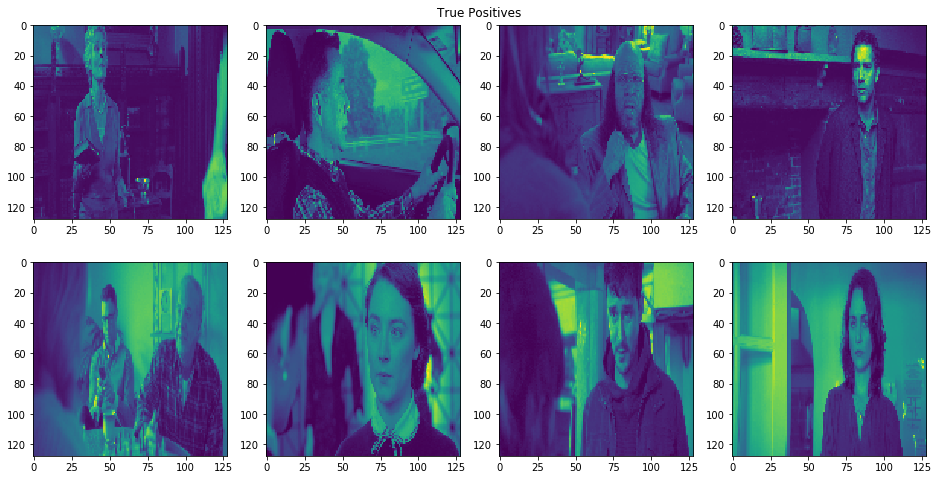

In [32]:
f = plt.figure(figsize=(16, 8))
plt.title('True Positives')
plt.axis('off')
ax1 = f.add_subplot(241)
ax2 = f.add_subplot(242)
ax3 = f.add_subplot(243)
ax4 = f.add_subplot(244)
ax5 = f.add_subplot(245)
ax6 = f.add_subplot(246)
ax7 = f.add_subplot(247)
ax8 = f.add_subplot(248)
ax1.imshow(array_to_img(test_images[true_positives[0]]), cmap = 'viridis')
ax2.imshow(array_to_img(test_images[true_positives[1]]), cmap = 'viridis')
ax3.imshow(array_to_img(test_images[true_positives[2]]), cmap = 'viridis')
ax4.imshow(array_to_img(test_images[true_positives[3]]), cmap = 'viridis')
ax5.imshow(array_to_img(test_images[true_positives[4]]), cmap = 'viridis')
ax6.imshow(array_to_img(test_images[true_positives[5]]), cmap = 'viridis')
ax7.imshow(array_to_img(test_images[true_positives[6]]), cmap = 'viridis')
ax8.imshow(array_to_img(test_images[true_positives[7]]), cmap = 'viridis')
plt.show()

### True Negatives

- Label: Non-MCU
- Model Preduction: Non-MCU

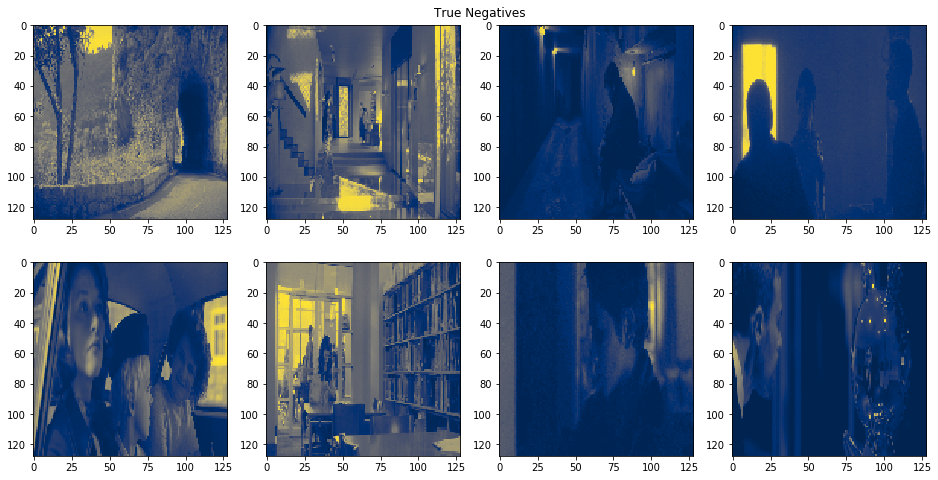

In [33]:
f = plt.figure(figsize=(16, 8))
plt.title('True Negatives')
plt.axis('off')
ax1 = f.add_subplot(241)
ax2 = f.add_subplot(242)
ax3 = f.add_subplot(243)
ax4 = f.add_subplot(244)
ax5 = f.add_subplot(245)
ax6 = f.add_subplot(246)
ax7 = f.add_subplot(247)
ax8 = f.add_subplot(248)
ax1.imshow(array_to_img(test_images[true_negatives[0]]), cmap = 'cividis')
ax2.imshow(array_to_img(test_images[true_negatives[1]]), cmap = 'cividis')
ax3.imshow(array_to_img(test_images[true_negatives[2]]), cmap = 'cividis')
ax4.imshow(array_to_img(test_images[true_negatives[3]]), cmap = 'cividis')
ax5.imshow(array_to_img(test_images[true_negatives[4]]), cmap = 'cividis')
ax6.imshow(array_to_img(test_images[true_negatives[5]]), cmap = 'cividis')
ax7.imshow(array_to_img(test_images[true_negatives[6]]), cmap = 'cividis')
ax8.imshow(array_to_img(test_images[true_negatives[7]]), cmap = 'cividis')
plt.show()

### False Positives

- Label: non-MCU
- Model Preduction: MCU

Some of these could arguably be counted as MCU images, owing to the difficulty of hand-labeling these images.

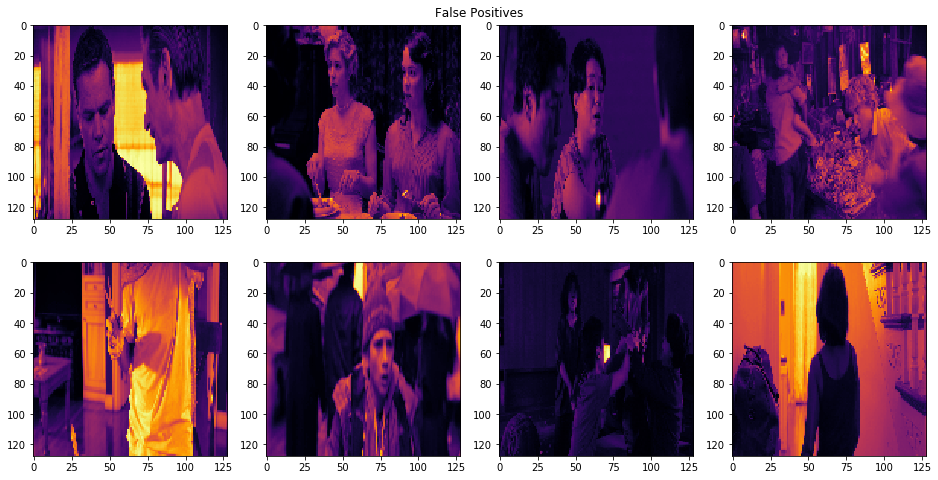

In [34]:
f = plt.figure(figsize=(16, 8))
plt.title('False Positives')
plt.axis('off')
ax1 = f.add_subplot(241)
ax2 = f.add_subplot(242)
ax3 = f.add_subplot(243)
ax4 = f.add_subplot(244)
ax5 = f.add_subplot(245)
ax6 = f.add_subplot(246)
ax7 = f.add_subplot(247)
ax8 = f.add_subplot(248)
ax1.imshow(array_to_img(test_images[false_positives[0]]), cmap='inferno')
ax2.imshow(array_to_img(test_images[false_positives[1]]), cmap='inferno')
ax3.imshow(array_to_img(test_images[false_positives[2]]), cmap='inferno')
ax4.imshow(array_to_img(test_images[false_positives[3]]), cmap='inferno')
ax5.imshow(array_to_img(test_images[false_positives[4]]), cmap='inferno')
ax6.imshow(array_to_img(test_images[false_positives[5]]), cmap='inferno')
ax7.imshow(array_to_img(test_images[false_positives[6]]), cmap='inferno')
ax8.imshow(array_to_img(test_images[false_positives[7]]), cmap='inferno')
plt.show()

### False Negatives

- Label: MCU
- Model Preduction: non-MCU

Generally, these examples appear to be MCUs.

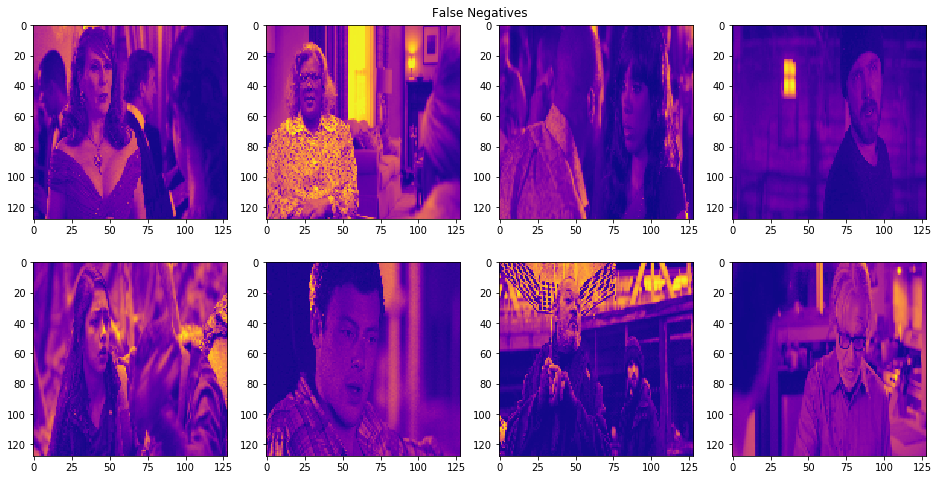

In [35]:
f = plt.figure(figsize=(16, 8))
plt.title('False Negatives')
plt.axis('off')
ax1 = f.add_subplot(241)
ax2 = f.add_subplot(242)
ax3 = f.add_subplot(243)
ax4 = f.add_subplot(244)
ax5 = f.add_subplot(245)
ax6 = f.add_subplot(246)
ax7 = f.add_subplot(247)
ax8 = f.add_subplot(248)
ax1.imshow(array_to_img(test_images[false_negatives[0]]), cmap = 'plasma')
ax2.imshow(array_to_img(test_images[false_negatives[1]]), cmap = 'plasma')
ax3.imshow(array_to_img(test_images[false_negatives[2]]), cmap = 'plasma')
ax4.imshow(array_to_img(test_images[false_negatives[3]]), cmap = 'plasma')
ax5.imshow(array_to_img(test_images[false_negatives[4]]), cmap = 'plasma')
ax6.imshow(array_to_img(test_images[false_negatives[5]]), cmap = 'plasma')
ax7.imshow(array_to_img(test_images[false_negatives[6]]), cmap = 'plasma')
ax8.imshow(array_to_img(test_images[false_negatives[7]]), cmap = 'plasma')
plt.show()

# Visualizing Activation Layers
It also helps to understand what various activations layers are looking for. At the beginning of the network are the filters that "look" at the largest images (126x126). As image data in repeatedly convoluted and pooled, it gets smaller and smaller, until filters are looking at tiny images (9x9). Below are examples of what the first and last activation layers see from an example screenshot.

In [18]:
tuned_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 64)      640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 58, 58, 64)        147520    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 25, 25, 128)       204928    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 9, 9, 256)        

In [51]:
# tensorize an example input image
img_path = train_mcu + '/ford_v_ferrari_frame257.jpg'

img = image.load_img(img_path, color_mode = 'grayscale', target_size=(128, 128))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

img_tensor /= 255.

print(img_tensor.shape)

(1, 128, 128, 1)


In [50]:
# generate image data for each activation layer, based on the input image
layer_outputs = [layer.output for layer in tuned_model.layers[:8]]
activation_model = models.Model(inputs=tuned_model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

### First Activation Layer
This is what's seen at the first activation layer, which is actually the input layer. These are 128x128 grayscale images, colorized with a single-channel colormap. These are the first 8 of 64 filters. The contents of the frame is clearly visible.

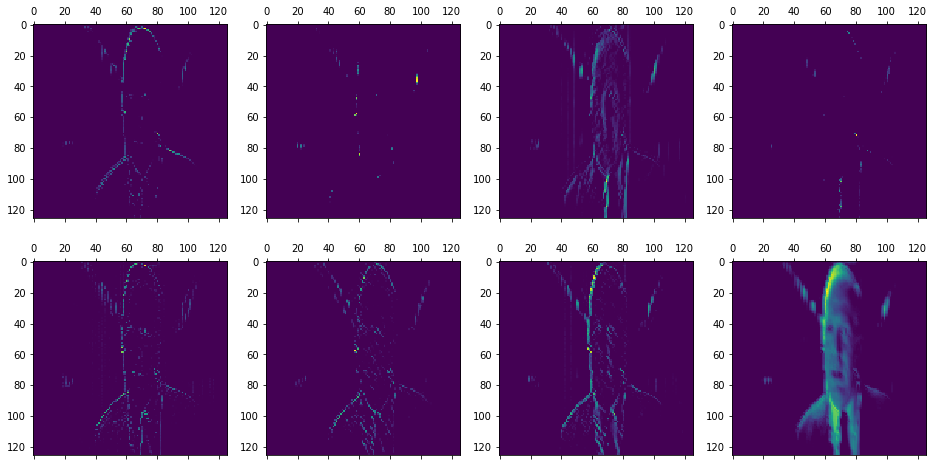

In [40]:
fig, axes = plt.subplots(2, 4, figsize=(16,8))
for i in range(8):
    row = i//4
    column = i%4
    ax = axes[row, column]
    first_layer_activation = activations[0] # this is the input Conv2D layer
    ax.matshow(first_layer_activation[0, :, :, i], cmap='viridis')

### Final Activation Layer
This is what's seen at the final activation layer, which is tied to a 4x4 CNN layer. These are 9x9 grayscale images, colorized with a single-channel colormap. These are the first 8 of 256 filters. We have virtually no idea what's being visualized here.

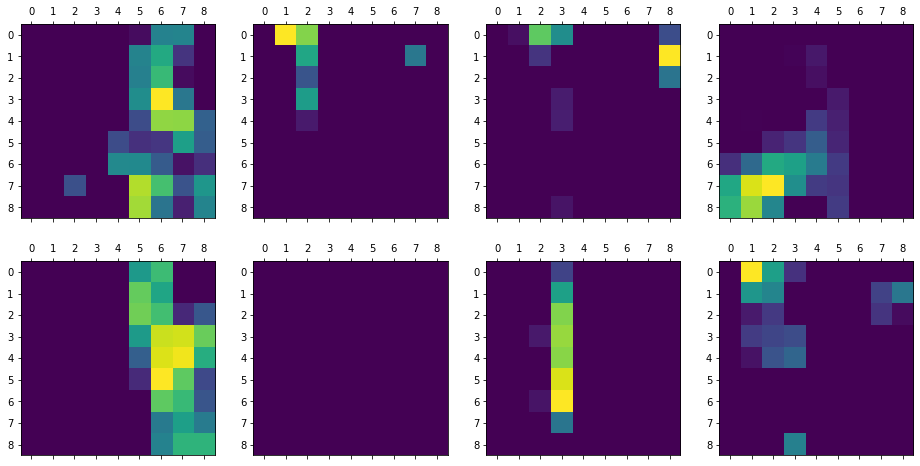

In [42]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i in range(8):
    row = i//4
    column = i%4
    ax = axes[row, column]
    last_layer_activation = activations[6] # this is the 4x4 Conv2D layer, not its Pooling layer
    ax.matshow(last_layer_activation[0, :, :, i], cmap='viridis')